### KHAI BÁO CÁC THƯ VIỆN CẦN THIẾT

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *
from sklearn import svm
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from perceptron_tu_code import Perceptron as P
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


### ĐỌC FILE DỮ LIỆU

In [13]:
df = pd.read_csv('diabetes.csv')

### CHUẨN HÓA DỮ LIỆU

In [14]:
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)

### LABEL VÀ FEATURES

In [15]:
features = df.iloc[:, 0:8]
label = df.iloc[:, 8]

### CHIA DỮ LIỆU THÀNH 2 PHẦN TRAIN VÀ TEST

In [16]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.3,shuffle=True)

## Perceptron

In [18]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.3,shuffle=True)

# Tạo model
model = Perceptron(alpha = 0.07, max_iter=6000)

# Train model
model.fit(x_train, y_train)

# dự đoán
y_pred = model.predict(x_test)

# lưu chỉ số
acc_perceptron = accuracy_score(y_pred,y_test)
precision_perceptron = precision_score(y_test, y_pred)
recall_perceptron = recall_score(y_test, y_pred)
f1_score_perceptron = f1_score(y_test, y_pred)

# In ra kết quả
print('acc Peceptron: ',acc_perceptron)
print('Precision Peceptron: ',precision_perceptron)
print('recall Peceptron: ',recall_perceptron)
print('f1_score Peceptron: ',f1_score_perceptron)

dict_columns = {
    'Pregnancies': [6],
    'Glucose': [148],
    'BloodPressure': [72],
    'SkinThickness': [35],
    'Insulin': [0],
    'BMI': [33.6],
    'DiabetesPedigreeFunction': [0.627],
    'Age': [50]
}
df = pd.DataFrame(dict_columns)
result = model.predict(df)
result[0]

acc Peceptron:  0.4805194805194805
Precision Peceptron:  0.39779005524861877
recall Peceptron:  0.8674698795180723
f1_score Peceptron:  0.5454545454545454


0

### SVM

In [77]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.3,shuffle=True)

# Tạo model
model = svm.SVC(kernel='linear', C=3.9)
'''
- kernel: Chọn loại hàm kernal được sử dụng trong mô hình
- gamma: Giá trị gamma càng cao, mô hình sẽ cố gắng tạo ra một ranh giới quyết định phức tạp hơn, có thể dẫn đến overfitting
- tol=0.001: là điều kiện dừng của quá trình tối ưu hóa. Nếu thay đổi giá trị của hàm mục tiêu dưới mức tol, thuật toán sẽ dừng lại
- C=0.0001: 
	+) Tham số C là tham số regularization, quyết định độ ưu tiên giữa việc tối ưu hóa margin và việc giảm thiểu sai số dự đoán trên tập dữ liệu đào tạo.
	+) Giá trị C càng lớn, mô hình sẽ cố gắng tối ưu hóa margin, có thể dẫn đến overfitting. Nếu C nhỏ, mô hình sẽ tập trung vào việc giảm thiểu sai số dự đoán, có thể dẫn đến underfitting.
'''

# train model
model.fit(x_train, y_train)

# dự đoán
y_pred = model.predict(x_test)


# Lưu chỉ số
acc_SVM = accuracy_score(y_pred,y_test)
precision_SVM = precision_score(y_test, y_pred, average="macro")
recall_SVM = recall_score(y_test, y_pred,average="macro")
f1_score_SVM = f1_score(y_test, y_pred, average="macro")

# In ra kết quả
print('acc SVM: ',acc_SVM)
print('Precision SVM: ',precision_SVM)
print('recall SVM: ',recall_SVM)
print('f1_score SVM: ',f1_score_SVM)

model.score(x_test, y_test)

acc SVM:  0.7792207792207793
Precision SVM:  0.7692857142857144
recall SVM:  0.7197701532311792
f1_score SVM:  0.7331294597349642


0.7792207792207793

### ID3

In [78]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.3,shuffle=True)

# Tạo model
model = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=50)

# train model
model.fit(x_train, y_train)

# dự đoán
y_pred = model.predict(x_test)

# Lưu chỉ số
acc_DecisionTreeClassifier = accuracy_score(y_pred,y_test)
precision_DecisionTreeClassifier = precision_score(y_test, y_pred)
recall_DecisionTreeClassifier = recall_score(y_test, y_pred)
f1_score_DecisionTreeClassifier = f1_score(y_test, y_pred)

# In ra kết quả
print('acc DecisionTreeClassifier: ',acc_DecisionTreeClassifier)
print('Precision DecisionTreeClassifier: ',precision_DecisionTreeClassifier)
print('recall DecisionTreeClassifier: ',recall_DecisionTreeClassifier)
print('f1_score DecisionTreeClassifier: ',f1_score_DecisionTreeClassifier)

model.score(x_test, y_test)

acc DecisionTreeClassifier:  0.7532467532467533
Precision DecisionTreeClassifier:  0.7014925373134329
recall DecisionTreeClassifier:  0.5595238095238095
f1_score DecisionTreeClassifier:  0.6225165562913907


0.7532467532467533

### LR

In [56]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.3,shuffle=True)

# Tạo model
model = LogisticRegression(C=0.7, solver='lbfgs', max_iter=1000)
'''
 Phương pháp để giải bài toán tối ưu hóa. Các lựa chọn bao gồm 'newton-cg', 'lbfgs', 'liblinear', 'sag', và 'saga'. Mặc định là 'lbfgs'
'''

# train model
model.fit(x_train, y_train)

# dự đoán
y_pred = model.predict(x_test)

# Lưu chỉ số
acc_LogisticRegression = accuracy_score(y_pred,y_test)
precision_LogisticRegression = precision_score(y_test, y_pred)
recall_LogisticRegression = recall_score(y_test, y_pred)
f1_score_LogisticRegression = f1_score(y_test, y_pred)

# In ra kết quả
print('acc LogisticRegression: ',acc_LogisticRegression)
print('Precision LogisticRegression: ',precision_LogisticRegression)
print('recall LogisticRegression: ',recall_LogisticRegression)
print('f1_score LogisticRegression: ',f1_score_LogisticRegression)

acc LogisticRegression:  0.8008658008658008
Precision LogisticRegression:  0.7164179104477612
recall LogisticRegression:  0.64
f1_score LogisticRegression:  0.676056338028169


### Neural Network

In [57]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.3,shuffle=True)

# Tạo model
model = MLPClassifier(hidden_layer_sizes=(540,800), max_iter=2000, alpha=0.92)

# train model
model.fit(x_train, y_train)

# dự đoán
y_pred = model.predict(x_test)


# lưu chỉ số
acc_MLPClassifier = accuracy_score(y_pred,y_test)
precision_MLPClassifier = precision_score(y_test, y_pred)
recall_MLPClassifier = recall_score(y_test, y_pred)
f1_score_MLPClassifier = f1_score(y_test, y_pred)

# In ra kết quả
print('acc MLPClassifier: ',acc_MLPClassifier)
print('Precision MLPClassifier: ',precision_MLPClassifier)
print('recall MLPClassifier: ',recall_MLPClassifier)
print('f1_score MLPClassifier: ',f1_score_MLPClassifier)



acc MLPClassifier:  0.6883116883116883
Precision MLPClassifier:  0.5729166666666666
recall MLPClassifier:  0.6395348837209303
f1_score MLPClassifier:  0.6043956043956044


### Vẽ biểu đồ để so sánh các độ đo Accuracy, Precision, Recal, F1 của các mô hình. 

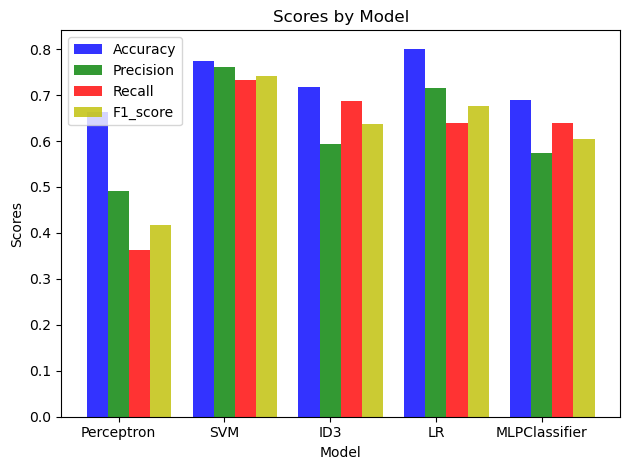

acc Perceptron:  0.6623376623376623
acc SVM:  0.7748917748917749
acc DecisionTreeClassifier:  0.7186147186147186
acc LogisticRegression:  0.8008658008658008
acc MLPClassifier:  0.6883116883116883


In [58]:
# Vẽ biểu đồ để so sánh các độ đo Accuracy, Precision, Recal, F1 của các mô hình. 
import matplotlib.pyplot as plt
import numpy as np

# data to plot
n_groups = 5
acc = (acc_perceptron, acc_SVM, acc_DecisionTreeClassifier, acc_LogisticRegression, acc_MLPClassifier)
precision = (precision_perceptron, precision_SVM, precision_DecisionTreeClassifier, precision_LogisticRegression, precision_MLPClassifier)
recall = (recall_perceptron, recall_SVM, recall_DecisionTreeClassifier, recall_LogisticRegression, recall_MLPClassifier)
f1_score = (f1_score_perceptron, f1_score_SVM, f1_score_DecisionTreeClassifier, f1_score_LogisticRegression, f1_score_MLPClassifier)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8

rects1 = plt.bar(index, acc, bar_width,
alpha=opacity,
color='b',
label='Accuracy')

rects2 = plt.bar(index + bar_width, precision, bar_width,
alpha=opacity,
color='g',
label='Precision')

rects3 = plt.bar(index + bar_width*2, recall, bar_width,
alpha=opacity,
color='r',
label='Recall')

rects4 = plt.bar(index + bar_width*3, f1_score, bar_width,
alpha=opacity,
color='y',
label='F1_score')

plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Scores by Model')
plt.xticks(index + bar_width, ('Perceptron', 'SVM', 'ID3', 'LR', 'MLPClassifier'))
plt.legend()

plt.tight_layout()
plt.show()


print('acc Perceptron: ',acc_perceptron)
print('acc SVM: ',acc_SVM)
print('acc DecisionTreeClassifier: ',acc_DecisionTreeClassifier)
print('acc LogisticRegression: ',acc_LogisticRegression)
print('acc MLPClassifier: ',acc_MLPClassifier)

